In [1]:
# requires utm, laspy and salem, available through pip

%matplotlib inline
import laspy 
import pylab as pl
import numpy as np
from scipy.interpolate import griddata
import matplotlib.patheffects as pe


import utm
import matplotlib

pl.rcParams['figure.figsize'] = (8, 6.0)
pl.rcParams['font.size'] = 16
#pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['axes.linewidth'] = 1.5 #set the value globally

matplotlib.rcParams['font.family'] = 'CMU Sans Serif'

In [4]:
import salem
from salem import DataLevels, GoogleVisibleMap, Map

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [66]:
def plotContourMap(shpfile, outfile, grayscale=False):
    shp = salem.read_shapefile(shpfile)
    
    # I you need to do a lot of maps you might want
    # to use an API key and set it here with key='YOUR_API_KEY'
    g = GoogleVisibleMap(x=[np.min(shp.min_x), np.max(shp.max_x)], 
                     y=[np.min(shp.min_y), np.max(shp.max_y)],
                     scale=2,  # scale is for more details
                     maptype='satellite')  # try out also: 'terrain'

    ggl_img = g.get_vardata()
    
    # prepare the figure
    fig = pl.figure(figsize=(10,10))

    ax = fig.add_subplot(111)

    if grayscale:
        ax.imshow(rgb2gray(ggl_img), cmap=pl.get_cmap('gray'), interpolation='none')
    else:
        ax.imshow(ggl_img)

    cmap = pl.get_cmap('jet')
    levmin = np.min(shp['level'])
    levmax = np.max(shp['level'])

    colors = [cmap((l-levmin)/(levmax-levmin)) for l in shp['level']]

    # make a map of the same size as the image (no country borders)
    sm = Map(g.grid, factor=1, countries=False)
    
    if not grayscale:
        sm.set_rgb(ggl_img)  # add the background rgb image
    
    sm.set_scale_bar(location=(0.88, 0.94))  # add scale
    scol = sm.set_shapefile(shp, color=colors, alpha=0.5)
    sm.visualize(ax=ax)  # plot it

    padscale = 0.5

    norm = matplotlib.colors.Normalize(vmin=levmin,vmax=levmax)
    smc = pl.cm.ScalarMappable(cmap=cmap, norm=norm)
    smc.set_array([])

    from matplotlib.ticker import MaxNLocator
    ticks = MaxNLocator(integer=True).tick_values(levmin, levmax)

    cb = pl.colorbar(
            smc, ticks=ticks, 
            boundaries=np.arange(levmin-padscale,levmax+padscale,1),
            fraction=0.046, pad=0.04
           )

    cb.set_label('Elevation [m]')

    pl.savefig(outfile, 
           bbox_inches="tight")

arg_altotocomar
arg_cerrovecar
chi_plb
chi_pajonales
per_imata
per_yanque


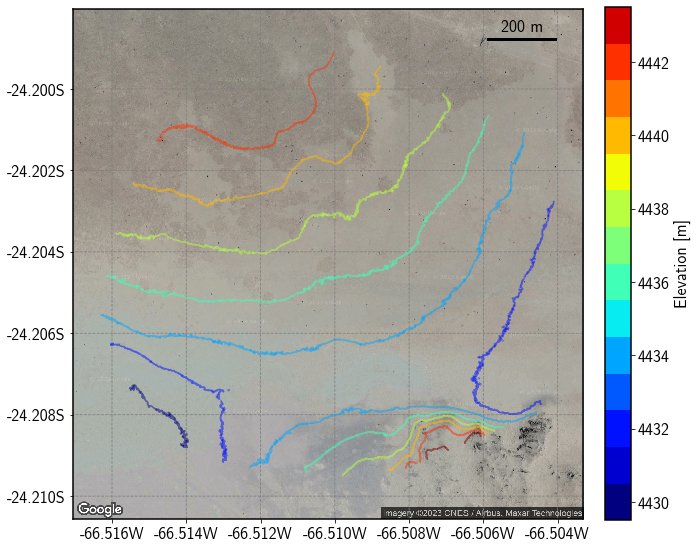

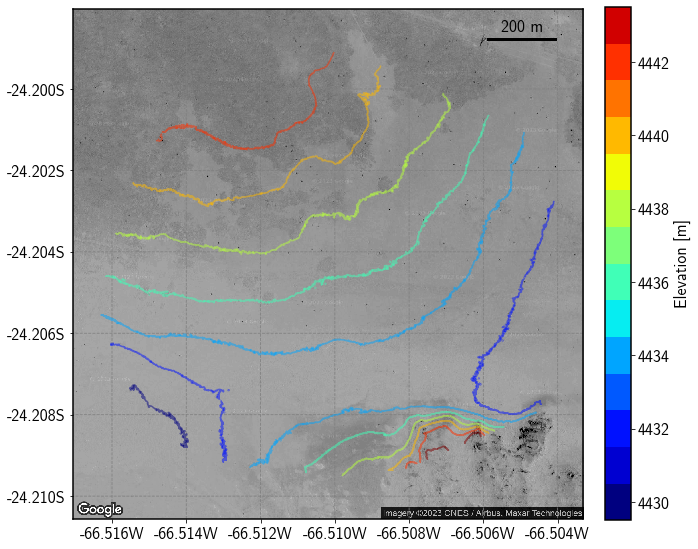

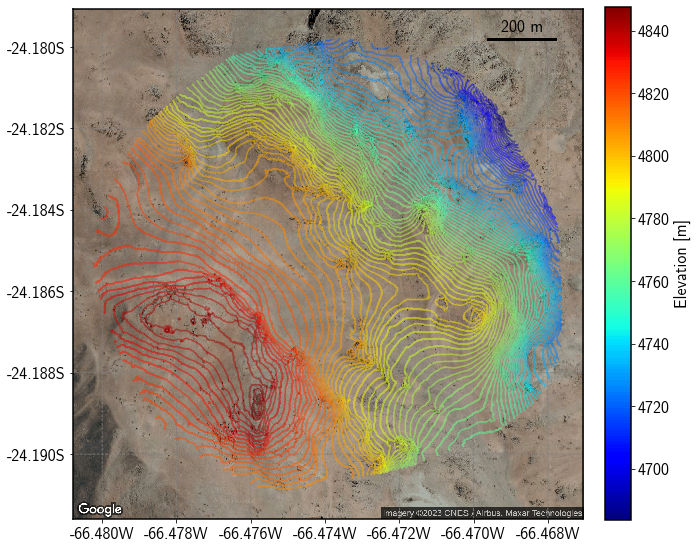

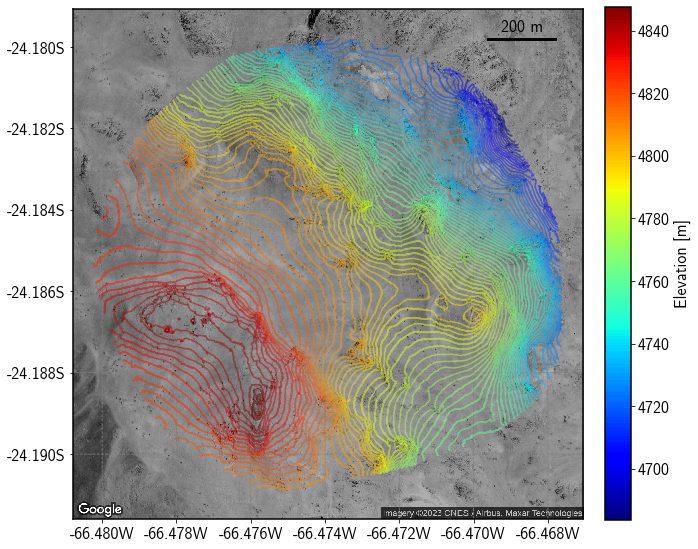

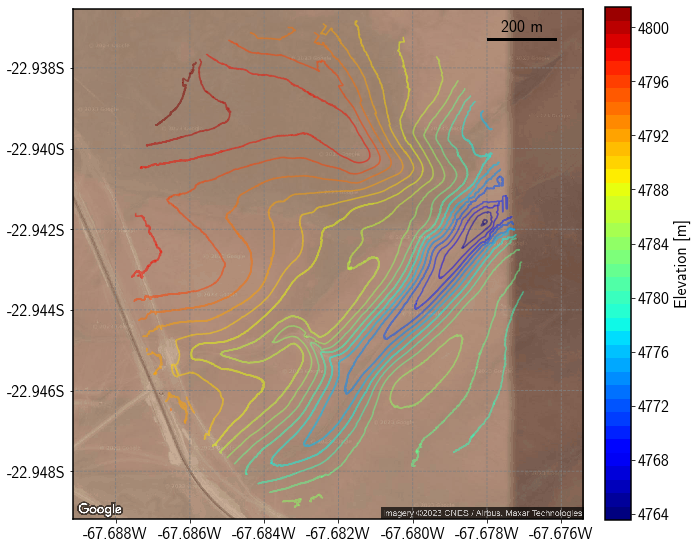

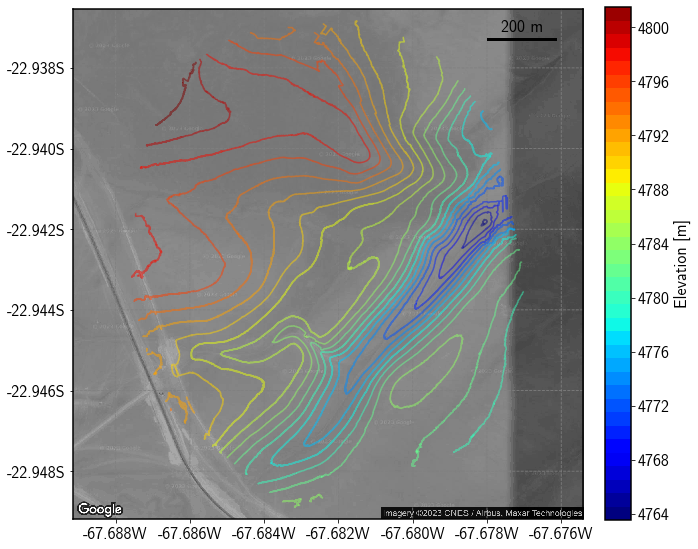

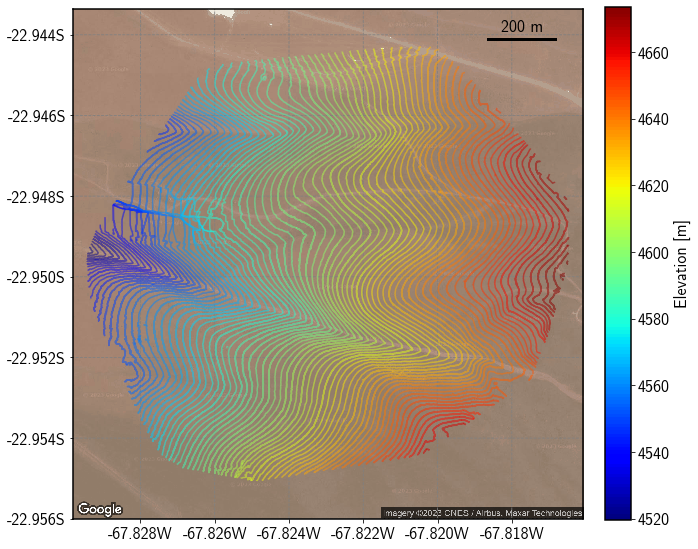

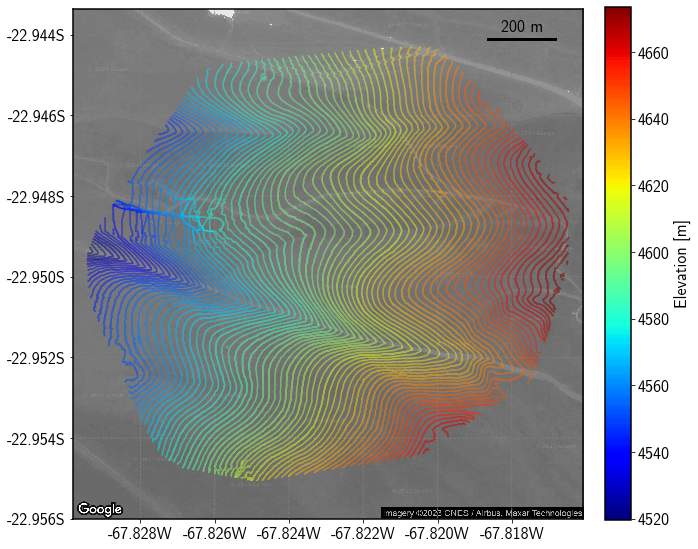

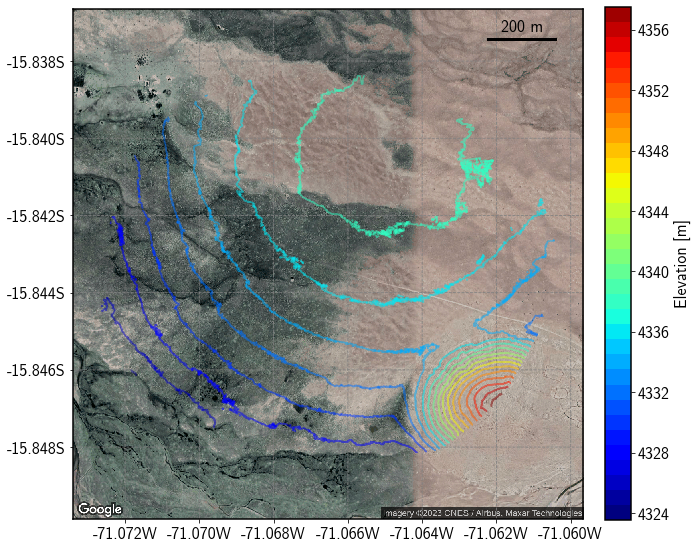

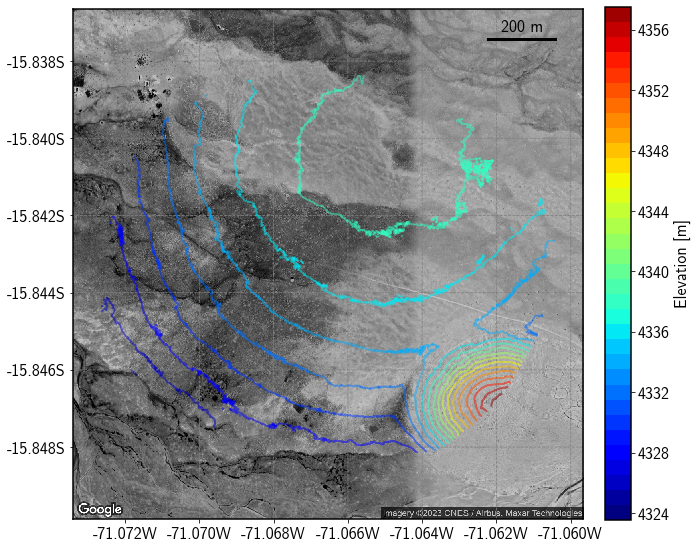

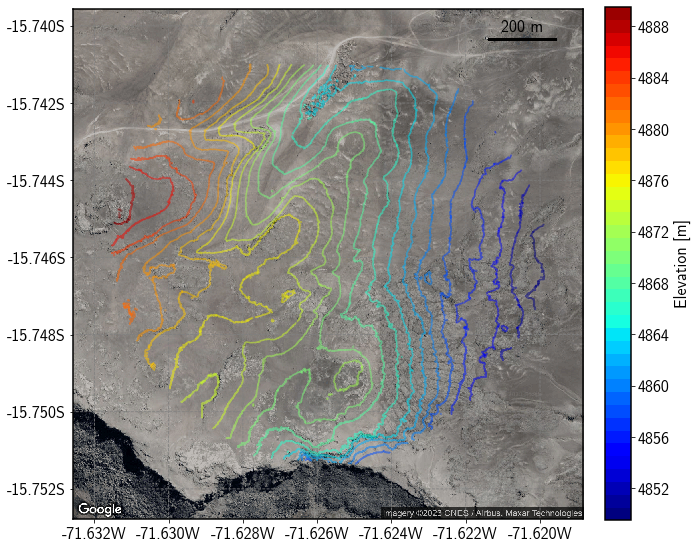

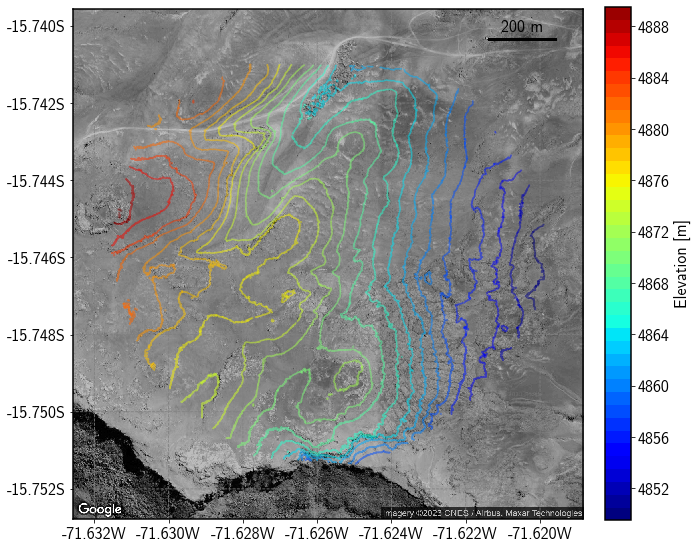

In [67]:
sites = [
    'arg_altotocomar',
    'arg_cerrovecar',
    'chi_plb',
    'chi_pajonales',
    'per_imata',
    'per_yanque'
]

for site in sites:
    print(site)
    shpfile = "/Users/jmsantander/swgo/sites/scans/" + site + "_shpfile_2m/output.shp"
    outfile = "/Users/jmsantander/swgo/sites/scans/" + site + "_contour_2m.pdf"
    plotContourMap(shpfile, outfile, grayscale=False)
    
    outfile = "/Users/jmsantander/swgo/sites/scans/" + site + "_contour_2m_gray.pdf"
    plotContourMap(shpfile, outfile, grayscale=True)
    